In [1]:
from qiskit import*
from qiskit.tools.visualization import plot_histogram
%matplotlib inline 

In [2]:
#classical search

In [3]:
myList = [5,6,4,7,8,9,1,2,3]

In [4]:
 def blackbox(number):
        winningNum=9
        if number == winningNum:
            response = True
        else:
            response = False
        return response

In [5]:
for index,number in enumerate(myList):
    if blackbox(number) is True:
        print(f"winning number index : {index}")
        print(f"execution count: {index+1}")
        break

winning number index : 5
execution count: 6


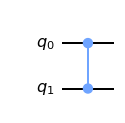

In [6]:
#Grover's Algorithm Quantum model
#oracle circuit -(Winning state 11)

oracleCircuit = QuantumCircuit(2,name='oraclaeCircuit')
oracleCircuit.cz(0,1)
oracleCircuit.to_gate()# oracleCircuit transformed to gate
oracleCircuit.draw(output='mpl')

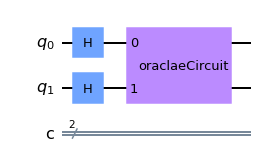

In [8]:
mainCircuit = QuantumCircuit(2,2)
mainCircuit.h([0,1])
mainCircuit.append(oracleCircuit,[0,1])
mainCircuit.draw(output='mpl')

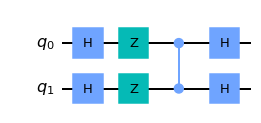

In [9]:
reflectionCircuit = QuantumCircuit(2,name="reflectionCircuit")
reflectionCircuit.h([0,1])
reflectionCircuit.z([0,1])
reflectionCircuit.cz(0,1)
reflectionCircuit.h([0,1])
reflectionCircuit.to_gate()
reflectionCircuit.draw(output='mpl')

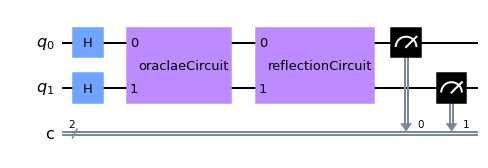

In [10]:
mainCircuit.append(reflectionCircuit,[0,1])
mainCircuit.measure([0,1],[0,1])
mainCircuit.draw(output='mpl')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


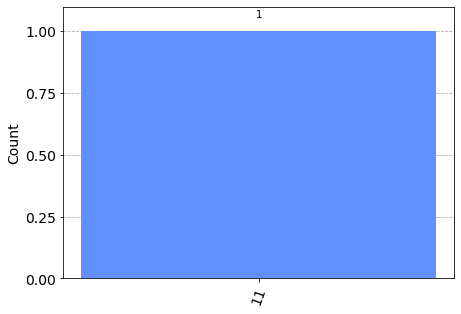

In [11]:
backend = Aer.get_backend('qasm_simulator')
result = execute(mainCircuit,backend=backend ,shots=1).result()
counts = result.get_counts(mainCircuit)
plot_histogram([counts])